In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon
from scipy.stats import ks_2samp
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [19]:
# Завантаження реальних та синтетичних даних
real_data = pd.read_csv('data.csv')
synthetic_data = pd.read_csv('synthetic_dataset.csv')


In [20]:
# Функція для обчислення JS-дивергенції між ознаками
def compute_js_divergence(real, synthetic):
    js_scores = {}
    for column in real.columns:
        if real[column].dtype in ['int64', 'float64']:
            real_hist, _ = np.histogram(real[column], bins=20, density=True)
            synthetic_hist, _ = np.histogram(synthetic[column], bins=20, density=True)
            js_scores[column] = jensenshannon(real_hist, synthetic_hist)
    return js_scores


In [21]:
# Функція для виконання KS-тесту
def compute_ks_test(real, synthetic):
    ks_scores = {}
    for column in real.columns:
        if real[column].dtype in ['int64', 'float64']:
            ks_scores[column] = ks_2samp(real[column], synthetic[column]).statistic
    return ks_scores

In [22]:
# Розрахунок JS-дивергенції та KS-тесту
js_scores = compute_js_divergence(real_data, synthetic_data)
ks_scores = compute_ks_test(real_data, synthetic_data)


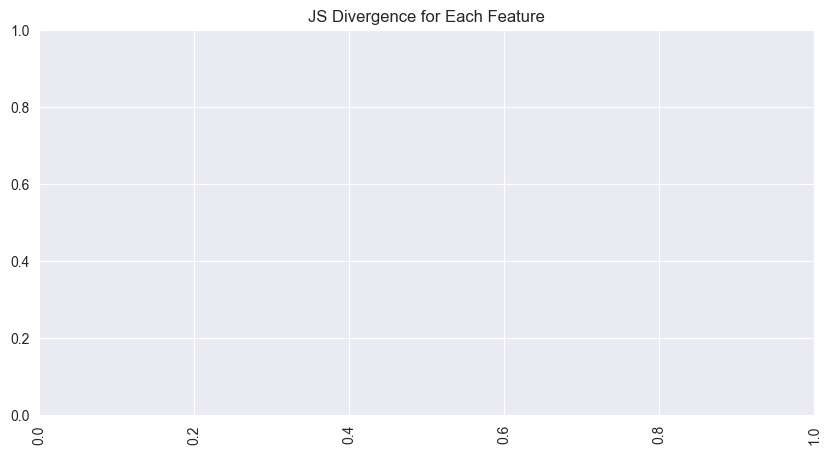

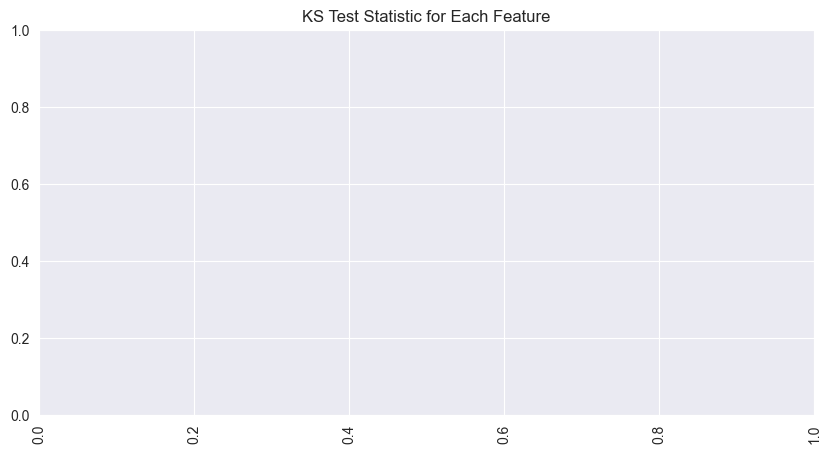

In [23]:
# Візуалізація результатів
plt.figure(figsize=(10, 5))
sns.barplot(x=list(js_scores.keys()), y=list(js_scores.values()))
plt.xticks(rotation=90)
plt.title('JS Divergence for Each Feature')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=list(ks_scores.keys()), y=list(ks_scores.values()))
plt.xticks(rotation=90)
plt.title('KS Test Statistic for Each Feature')
plt.show()

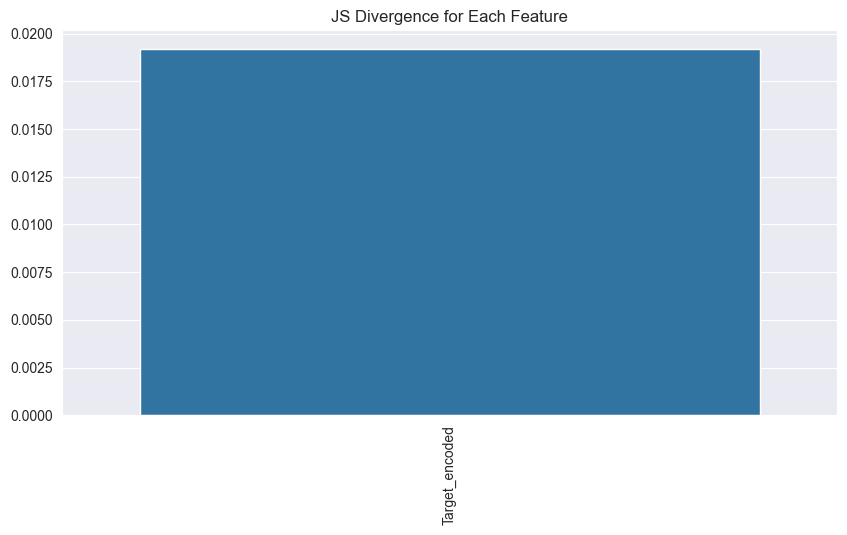

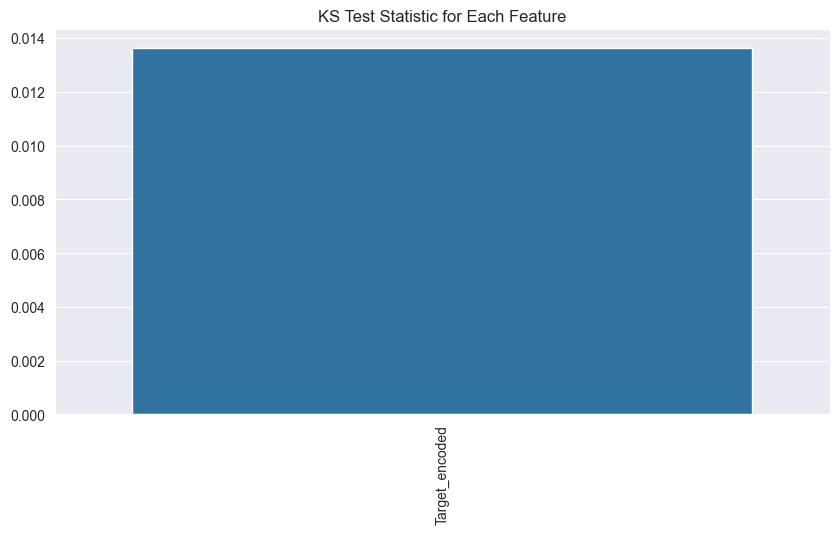

ValueError: could not convert string to float: '1;44;1;9147;1;39;130.0;1;19;1;9;3;130.0;0;0;0;1;0;1;20;0;4;7;8;7;13.0;0;2;5;5;5;13.4;0;11.1;0.6;2.02;Graduate'

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon
from scipy.stats import ks_2samp
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Завантаження реальних та синтетичних даних
# Combine features and target into a single DataFrame
df = pd.read_csv('data.csv', delimiter=';')

# Encode target variable
mapping = {'Graduate': 0, 'Dropout': 1, 'Enrolled': 2}
real_data['Target_encoded'] = df['Target'].map(mapping)
synthetic_data = pd.read_csv('synthetic_dataset.csv')

# Функція для обчислення JS-дивергенції між ознаками
def compute_js_divergence(real, synthetic):
    js_scores = {}
    for column in real.columns:
        if real[column].dtype in ['int64', 'float64']:
            real_hist, _ = np.histogram(real[column], bins=20, density=True)
            synthetic_hist, _ = np.histogram(synthetic[column], bins=20, density=True)
            js_scores[column] = jensenshannon(real_hist, synthetic_hist)
    return js_scores

# Функція для виконання KS-тесту
def compute_ks_test(real, synthetic):
    ks_scores = {}
    for column in real.columns:
        if real[column].dtype in ['int64', 'float64']:
            ks_scores[column] = ks_2samp(real[column], synthetic[column]).statistic
    return ks_scores

# Розрахунок JS-дивергенції та KS-тесту
js_scores = compute_js_divergence(real_data, synthetic_data)
ks_scores = compute_ks_test(real_data, synthetic_data)

# Візуалізація результатів
plt.figure(figsize=(10, 5))
sns.barplot(x=list(js_scores.keys()), y=list(js_scores.values()))
plt.xticks(rotation=90)
plt.title('JS Divergence for Each Feature')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=list(ks_scores.keys()), y=list(ks_scores.values()))
plt.xticks(rotation=90)
plt.title('KS Test Statistic for Each Feature')
plt.show()

# t-SNE візуалізація
real_sample = real_data.sample(500)
synthetic_sample = synthetic_data.sample(500)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(pd.concat([real_sample, synthetic_sample]))
labels = ['Real'] * len(real_sample) + ['Synthetic'] * len(synthetic_sample)
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels)
plt.title('t-SNE Visualization of Real vs. Synthetic Data')
plt.show()

# Аналіз Generalization Gap
X_train, X_test, y_train, y_test = train_test_split(real_data.drop(columns=['target']), real_data['target'], test_size=0.2, random_state=42)
X_synthetic = synthetic_data.drop(columns=['target'])
y_synthetic = synthetic_data['target']

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Навчання на реальних даних
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

gap_real = train_acc - test_acc
print(f'Generalization Gap (Real Data): {gap_real:.4f}')

# Навчання на синтетичних даних
model.fit(X_synthetic, y_synthetic)
y_train_synthetic_pred = model.predict(X_synthetic)
y_test_synthetic_pred = model.predict(X_test)
test_acc_synthetic = accuracy_score(y_test, y_test_synthetic_pred)

gap_synthetic = train_acc - test_acc_synthetic
print(f'Generalization Gap (Synthetic Data): {gap_synthetic:.4f}')

# Завантаження реальних та синтетичних даних
real_data = pd.read_csv('data.csv')
synthetic_data = pd.read_csv('synthetic_dataset.csv')

# Функція для обчислення JS-дивергенції між ознаками
def compute_js_divergence(real, synthetic):
    js_scores = {}
    for column in real.columns:
        if real[column].dtype in ['int64', 'float64']:
            real_hist, _ = np.histogram(real[column], bins=20, density=True)
            synthetic_hist, _ = np.histogram(synthetic[column], bins=20, density=True)
            js_scores[column] = jensenshannon(real_hist, synthetic_hist)
    return js_scores

# Функція для виконання KS-тесту
def compute_ks_test(real, synthetic):
    ks_scores = {}
    for column in real.columns:
        if real[column].dtype in ['int64', 'float64']:
            ks_scores[column] = ks_2samp(real[column], synthetic[column]).statistic
    return ks_scores

# Розрахунок JS-дивергенції та KS-тесту
js_scores = compute_js_divergence(real_data, synthetic_data)
ks_scores = compute_ks_test(real_data, synthetic_data)

# Візуалізація результатів
plt.figure(figsize=(10, 5))
sns.barplot(x=list(js_scores.keys()), y=list(js_scores.values()))
plt.xticks(rotation=90)
plt.title('JS Divergence for Each Feature')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=list(ks_scores.keys()), y=list(ks_scores.values()))
plt.xticks(rotation=90)
plt.title('KS Test Statistic for Each Feature')
plt.show()

# t-SNE візуалізація
real_sample = real_data.sample(500)
synthetic_sample = synthetic_data.sample(500)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(pd.concat([real_sample, synthetic_sample]))
labels = ['Real'] * len(real_sample) + ['Synthetic'] * len(synthetic_sample)
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels)
plt.title('t-SNE Visualization of Real vs. Synthetic Data')
plt.show()

# Аналіз Generalization Gap
X_train, X_test, y_train, y_test = train_test_split(real_data.drop(columns=['target']), real_data['target'], test_size=0.2, random_state=42)
X_synthetic = synthetic_data.drop(columns=['target'])
y_synthetic = synthetic_data['target']

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Навчання на реальних даних
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

gap_real = train_acc - test_acc
print(f'Generalization Gap (Real Data): {gap_real:.4f}')

# Навчання на синтетичних даних
model.fit(X_synthetic, y_synthetic)
y_train_synthetic_pred = model.predict(X_synthetic)
y_test_synthetic_pred = model.predict(X_test)
test_acc_synthetic = accuracy_score(y_test, y_test_synthetic_pred)

gap_synthetic = train_acc - test_acc_synthetic
print(f'Generalization Gap (Synthetic Data): {gap_synthetic:.4f}')
